In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
diamonds_train = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto5/Diamond-Price-Prediction/train.csv')

In [77]:
diamonds_test = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto5/Diamond-Price-Prediction/test.csv')

In [4]:
diamonds_train.shape

(40455, 11)

In [5]:
diamonds_train.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983


In [6]:
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [7]:
diamonds_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

#### CATEGORICAL FEATURES

In [8]:
diamonds_train.cut.value_counts()

Ideal        16230
Premium      10338
Very Good     9003
Good          3682
Fair          1202
Name: cut, dtype: int64

In [9]:
dic_cut = {'Ideal': '1', 'Premium': '2', 'Very Good': '3', 'Good': '4', 'Fair': '5'}

In [10]:
diamonds_train.cut = diamonds_train.cut.map(dic_cut)

#### COLOR IS MORE IMPORTANT THAN CLARITY (ojo)

In [11]:
diamonds_train.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [12]:
#THE COLOR SCALE STARTS AT D, WICH IS NOT TOP QUALITY

In [13]:
dic_color = {'D': '1', 'E': '2', 'F': '3', 'G': '4', 'H': '5', 'I': '6', 'J': '7'}

In [14]:
diamonds_train.color = diamonds_train.color.map(dic_color)

In [15]:
diamonds_train.color.value_counts()

4    8410
2    7368
3    7182
5    6203
1    5100
6    4070
7    2122
Name: color, dtype: int64

In [16]:
diamonds_train.clarity.unique()

array(['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [17]:
dic_clarity = {'I1': '1', 'SI2': '2', 'SI1': '3', 'VS2': '4', 'VS1': '5', 'VVS2': '6', 'VVS1': '7', 'IF': '8'}

In [18]:
diamonds_train.clarity = diamonds_train.clarity.map(dic_clarity)

In [19]:
#diamonds_train.drop(columns=['id', 'x'], inplace=True)

In [20]:
diamonds_train_corr = diamonds_train.corr()

In [21]:
diamonds_train_corr

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.003045,-0.000405,0.000783,-0.002447,-0.001936,-0.001273,-0.003194
carat,-0.003045,1.000000,0.023585,0.185478,0.974648,0.944419,0.947469,0.920064
depth,-0.000405,0.023585,1.000000,-0.299203,-0.029867,-0.033960,0.089474,-0.003292
table,0.000783,0.185478,-0.299203,1.000000,0.200374,0.186788,0.153726,0.162804
x,-0.002447,0.974648,-0.029867,0.200374,1.000000,0.967315,0.965496,0.957668
y,-0.001936,0.944419,-0.033960,0.186788,0.967315,1.000000,0.941176,0.928909
z,-0.001273,0.947469,0.089474,0.153726,0.965496,0.941176,1.000000,0.930014
price,-0.003194,0.920064,-0.003292,0.162804,0.957668,0.928909,0.930014,1.000000


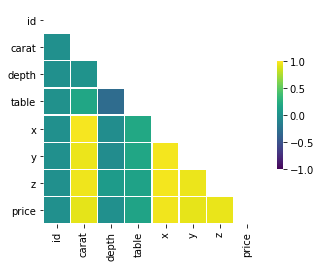

In [22]:
mascara = np.triu(np.ones_like(diamonds_train_corr, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True) 

sns.heatmap(diamonds_train_corr, 
            mask=mascara,
            cmap="viridis",
            vmax=1,
            vmin=-1,
            square=True, 
            linewidth=.5, 
            cbar_kws={"shrink": .5} 
);

In [23]:
X = diamonds_train.drop('price', axis=1)

In [24]:
y = diamonds_train.price

In [25]:
linear_model = LinearRegression()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_train_pred = linear_model.predict(X_train)

In [30]:
(mean_squared_error(y_train, y_train_pred)) ** 0.5

0.1942284951535887

In [31]:
y_test_pred = linear_model.predict(X_test)

In [32]:
(mean_squared_error(y_test, y_test_pred)) ** 0.5

0.18145494026987538

In [33]:
#linear_model_ = smf.ols("price ~ X", data=diamonds_train).fit()
#linear_model_.summary()

#### DCISION TREE REGRESSION

In [52]:
tree_model = DecisionTreeRegressor(max_depth=15)

In [53]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [54]:
y_test_pred2 = tree_model.predict(X_test)

In [55]:
(mean_squared_error(y_test, y_test_pred2)) ** 0.5

0.11895772662567132

In [57]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [11, 12, 13, 14, 15],
        "min_samples_split": [30, 50, 70, 100],
    },
    cv=10,
    verbose=3,
    scoring="neg_root_mean_squared_error",
    return_train_score=True
)

In [58]:
%%time
gs.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END max_depth=11, min_samples_split=30;, score=(train=-0.099, test=-0.125) total time=   0.1s
[CV 2/10] END max_depth=11, min_samples_split=30;, score=(train=-0.100, test=-0.114) total time=   0.1s
[CV 3/10] END max_depth=11, min_samples_split=30;, score=(train=-0.100, test=-0.118) total time=   0.1s
[CV 4/10] END max_depth=11, min_samples_split=30;, score=(train=-0.099, test=-0.118) total time=   0.1s
[CV 5/10] END max_depth=11, min_samples_split=30;, score=(train=-0.099, test=-0.114) total time=   0.1s
[CV 6/10] END max_depth=11, min_samples_split=30;, score=(train=-0.100, test=-0.120) total time=   0.1s
[CV 7/10] END max_depth=11, min_samples_split=30;, score=(train=-0.099, test=-0.121) total time=   0.1s
[CV 8/10] END max_depth=11, min_samples_split=30;, score=(train=-0.100, test=-0.115) total time=   0.1s
[CV 9/10] END max_depth=11, min_samples_split=30;, score=(train=-0.100, test=-0.118) total time=   0.1s
[

[CV 10/10] END max_depth=12, min_samples_split=100;, score=(train=-0.111, test=-0.123) total time=   0.1s
[CV 1/10] END max_depth=13, min_samples_split=30;, score=(train=-0.087, test=-0.123) total time=   0.1s
[CV 2/10] END max_depth=13, min_samples_split=30;, score=(train=-0.089, test=-0.111) total time=   0.1s
[CV 3/10] END max_depth=13, min_samples_split=30;, score=(train=-0.088, test=-0.114) total time=   0.1s
[CV 4/10] END max_depth=13, min_samples_split=30;, score=(train=-0.088, test=-0.115) total time=   0.1s
[CV 5/10] END max_depth=13, min_samples_split=30;, score=(train=-0.087, test=-0.109) total time=   0.1s
[CV 6/10] END max_depth=13, min_samples_split=30;, score=(train=-0.088, test=-0.112) total time=   0.1s
[CV 7/10] END max_depth=13, min_samples_split=30;, score=(train=-0.088, test=-0.118) total time=   0.1s
[CV 8/10] END max_depth=13, min_samples_split=30;, score=(train=-0.089, test=-0.112) total time=   0.1s
[CV 9/10] END max_depth=13, min_samples_split=30;, score=(trai

[CV 10/10] END max_depth=14, min_samples_split=100;, score=(train=-0.109, test=-0.122) total time=   0.1s
[CV 1/10] END max_depth=15, min_samples_split=30;, score=(train=-0.083, test=-0.119) total time=   0.1s
[CV 2/10] END max_depth=15, min_samples_split=30;, score=(train=-0.084, test=-0.111) total time=   0.1s
[CV 3/10] END max_depth=15, min_samples_split=30;, score=(train=-0.083, test=-0.113) total time=   0.1s
[CV 4/10] END max_depth=15, min_samples_split=30;, score=(train=-0.083, test=-0.113) total time=   0.1s
[CV 5/10] END max_depth=15, min_samples_split=30;, score=(train=-0.083, test=-0.110) total time=   0.1s
[CV 6/10] END max_depth=15, min_samples_split=30;, score=(train=-0.084, test=-0.112) total time=   0.1s
[CV 7/10] END max_depth=15, min_samples_split=30;, score=(train=-0.083, test=-0.116) total time=   0.1s
[CV 8/10] END max_depth=15, min_samples_split=30;, score=(train=-0.084, test=-0.111) total time=   0.1s
[CV 9/10] END max_depth=15, min_samples_split=30;, score=(trai

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [11, 12, 13, 14, 15],
                         'min_samples_split': [30, 50, 70, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [59]:
grid_search_results = pd.DataFrame(gs.cv_results_)
grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [60]:
grid_search_results.sort_values("mean_test_score", ascending=False)

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
16,15,30,-0.113427,-0.083404
12,14,30,-0.113737,-0.085112
8,13,30,-0.114382,-0.088066
17,15,50,-0.115381,-0.094389
13,14,50,-0.115560,-0.095161
4,12,30,-0.115796,-0.092902
9,13,50,-0.116563,-0.096728
18,15,70,-0.117467,-0.101445
14,14,70,-0.117624,-0.101862
5,12,50,-0.117752,-0.099687


In [61]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=15, min_samples_split=30)

In [67]:
tree_model2 = DecisionTreeRegressor(max_depth=15, min_samples_split=30)

In [68]:
tree_model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=30)

In [69]:
y_test_pred = tree_model2.predict(X_test)

In [70]:
(mean_squared_error(y_test, y_test_pred)) ** 0.5

0.11079182071865772

#### RANDOM FOREST (BASADO EN EL GRID SEARCH ANTERIOR)

In [71]:
random_forest = RandomForestRegressor(n_estimators=50, max_features=8, max_depth=15, min_samples_split=30)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=8, min_samples_split=30,
                      n_estimators=50)

In [72]:
y_test_pred = random_forest.predict(X_test)

In [73]:
(mean_squared_error(y_test, y_test_pred)) ** 0.5

0.09594861709875653

In [78]:
diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [79]:
diamonds_test.clarity = diamonds_test.clarity.map(dic_clarity)

In [80]:
diamonds_test.color = diamonds_test.color.map(dic_color)

In [81]:
diamonds_test.cut = diamonds_test.cut.map(dic_cut)

In [82]:
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,1,6,3,60.5,58.0,4.43,4.49,2.70
1,1,1.24,2,6,3,62.9,60.0,6.80,6.74,4.26
2,2,1.66,2,1,3,62.0,59.0,7.55,7.60,4.70
3,3,0.75,2,1,2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,5,2,2,64.8,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,2,4,3,59.6,60.0,6.74,6.70,4.00
13481,13481,0.90,3,1,3,62.1,60.0,6.14,6.20,3.83
13482,13482,0.30,1,3,4,62.1,53.3,4.30,4.32,2.68
13483,13483,1.25,1,6,3,59.6,59.0,7.01,7.09,4.20


In [83]:
y_price_pred = random_forest.predict(diamonds_test)

In [84]:
y_price_pred

array([6.12522637, 8.53961453, 9.49095466, ..., 6.44252386, 8.74043701,
       8.00493943])

In [85]:
diamonds_test['price'] = y_price_pred

In [86]:
diamonds_test.drop(columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'], inplace=True)

In [87]:
diamonds_test

,id,price
0,0,6.125226
1,1,8.539615
2,2,9.490955
3,3,7.858289
4,4,8.904535
...,...,...
13480,13480,8.552932
13481,13481,8.386278
13482,13482,6.442524
13483,13483,8.740437


In [88]:
diamonds_test.to_csv('diamonds_sub.csv', index = False)